# **Project of Swatisama Guha Thakurta**

**Python code**

**The Raw_Reviews dataset contains the following columns:**

Product_ID: Unique identifier for the product.

Age: Age of the reviewer.

Title: Title of the review (some missing values).

Text_Review: The content of the review.

Rating: Star rating given by the reviewer (likely on a scale from 1 to 5).

Type: Type or category of the product (e.g., Dresses, Tops, etc.).

To generate insights beyond overall sentiment, we will start exploring aspects like:

**Age-based Analysis**: How do different age groups perceive products?

**Category Analysis**: Which product types receive the best or worst ratings?

**Review Length vs Rating**: Are longer reviews associated with more critical or positive feedback?

**Common Phrases**: Common Phrases in Positive vs Negative Reviews: Use Natural Language Processing (NLP) techniques to identify frequent words or phrases in 5-star reviews compared to 1- or 2-star reviews.

**Rating Discrepancies by Product Type**: Highlight any specific products that have particularly polarized reviews (e.g., a mix of 1-star and 5-star reviews).

**Analysis of Missing Review Titles:** Explore if missing titles indicate any pattern in terms of rating or review content.



In [1]:
#Install Required Libraries
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install nltk


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Raw_Reviews.csv"


Mounted at /content/drive


In [3]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For more advanced and aesthetic visualizations

In [4]:
data_frame=pd.read_csv(file_path)

# **handling missing values**

In [5]:
#missing values per column
data_frame.isnull().sum()

,0
Product_ID,0
Age,0
Title,3810
Text_Review,845
Rating,0
Type,14


In [6]:
def handle_missing_values(df):
  #handling missing value in Text_Review column
  df['Text_Review'].fillna("No Review", inplace=True)

  #handling missing value in Title column

  df['Title'].fillna("No Title", inplace=True)
  #handling missing value in type column
  df['Type'].fillna("Unknown", inplace=True)
  return df

data_frame = handle_missing_values(data_frame)

In [7]:
data_frame.isnull().sum()

,0
Product_ID,0
Age,0
Title,0
Text_Review,0
Rating,0
Type,0


Once the missing values are handled, We will start with **Age group wise analysis**.

we can focus on the following steps:

**Age Distribution**: First we need to understand the distribution of ages in the dataset.

**Age vs Rating Distribution**: We will how ratings vary across different age groups.

**Product Type Preference by Age**: Find which product types are more popular among specific age groups.

**Rating Spread within Age Groups**: We will check if any age groups tend to give consistently higher or lower ratings.


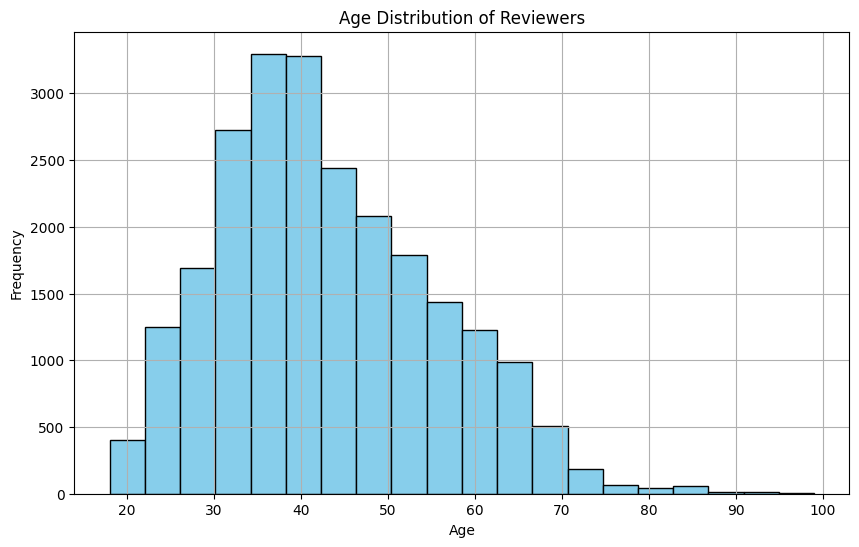

       count       mean        std   min   25%   50%   75%   max
Age  23486.0  43.198544  12.279544  18.0  34.0  41.0  52.0  99.0


In [8]:
def age_summary_of_reviewers(data_frame):
  # Plotting the age distribution using a histogram
  plt.figure(figsize=(10,6))
  plt.hist(data_frame['Age'].dropna(), bins=20, edgecolor='black', color='skyblue')
  plt.title('Age Distribution of Reviewers')
  plt.xlabel('Age')
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

  # Summary statistics for the Age column
  age_summary = data_frame['Age'].describe()

  # Creating a table for summary statistics
  summary_df = pd.DataFrame(age_summary).transpose()
  return summary_df

# Displaying the table to the console
print(age_summary_of_reviewers(data_frame))

Now we will create Age groups and then create  a table of the distribution of ages

In [9]:
def add_age_bins(df):
  # Creating age bins for table
  age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
  age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
  df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
  return df

def make_age_distribution_df(df):
  # Creating a table of the distribution of ages
  age_distribution_table = df['Age_Group'].value_counts().sort_index()

  # Converting the age distribution to a DataFrame
  age_distribution_df = pd.DataFrame(age_distribution_table).reset_index()
  age_distribution_df.columns = ['Age_Group', 'Count']
  return age_distribution_df

data_frame = add_age_bins(data_frame)
age_distribution_df = make_age_distribution_df(data_frame)

# Display the table
print(age_distribution_df)

  Age_Group  Count
0     18-25   1219
1     26-35   5753
2     36-45   7391
3     46-55   4909
4     56-65   3050
5     66-75    993
6       75+    167


<ipython-input-10-dac18e69e93b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rating_distribution = data_frame.groupby('Age_Group')['Rating'].mean().reset_index()


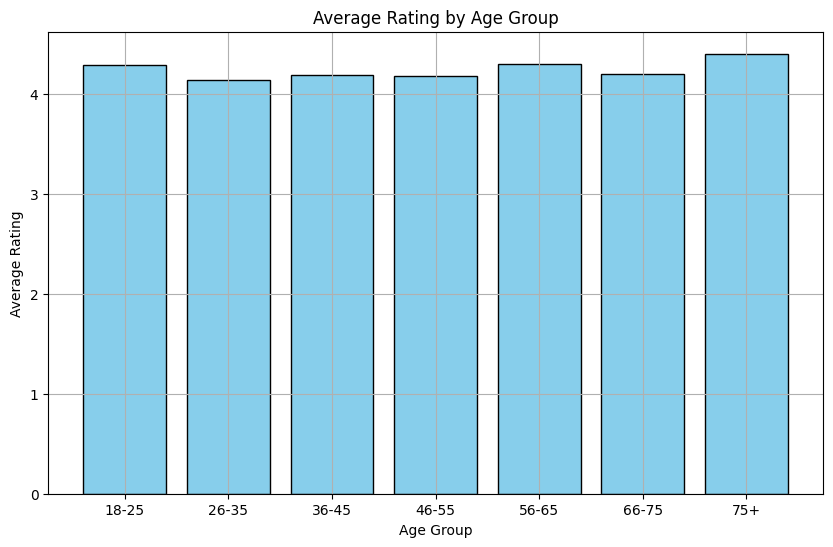

  Age_Group    Rating
0     18-25  4.292043
1     26-35  4.136451
2     36-45  4.191043
3     46-55  4.175596
4     56-65  4.301639
5     66-75  4.201410
6       75+  4.401198


In [10]:
def group_by_age_and_calc_average_rating(df):
  # Grouping by Age Group and calculating average rating
  age_rating_distribution = data_frame.groupby('Age_Group')['Rating'].mean().reset_index()
  return age_rating_distribution

def plot_age_rating_distribution(age_rating_distribution):
  # Plotting the Age vs Rating distribution
  plt.figure(figsize=(10,6))
  plt.bar(age_rating_distribution['Age_Group'], age_rating_distribution['Rating'], color='skyblue', edgecolor='black')
  plt.title('Average Rating by Age Group')
  plt.xlabel('Age Group')
  plt.ylabel('Average Rating')
  plt.grid(True)
  plt.show()

age_rating_distribution = group_by_age_and_calc_average_rating(data_frame)
plot_age_rating_distribution(age_rating_distribution)

# Displaying the table with Age vs Rating distribution
print(age_rating_distribution)

There doesn't seem to be a significant difference in average ratings across the different age groups, as they all cluster around similar values.

We would like to focus on this- Product Category Influence: Check if specific product categories (e.g., dresses, tops) show different patterns across age groups in terms of ratings.

In [11]:
def age_product_rating(df):
  # Grouping by Age Group and Product Type to calculate the average rating for each combination
  age_product_rating = df.groupby(['Age_Group', 'Type'])['Rating'].mean().reset_index()

  # Filling NaN values in the Rating column with 0
  age_product_rating['Rating'].fillna(0, inplace=True)
  return age_product_rating

age_product_rating = age_product_rating(data_frame)

# Displaying the updated data
print(age_product_rating)

   Age_Group      Type    Rating
0      18-25   Bottoms  4.375691
1      18-25   Dresses  4.292958
2      18-25  Intimate  4.295652
3      18-25   Jackets  4.370370
4      18-25      Tops  4.266932
5      18-25     Trend  3.400000
6      18-25   Unknown  5.000000
7      26-35   Bottoms  4.214689
8      26-35   Dresses  4.091537
9      26-35  Intimate  4.265537
10     26-35   Jackets  4.177606
11     26-35      Tops  4.104696
12     26-35     Trend  4.222222
13     26-35   Unknown  5.000000
14     36-45   Bottoms  4.270396
15     36-45   Dresses  4.155644
16     36-45  Intimate  4.295276
17     36-45   Jackets  4.269896
18     36-45      Tops  4.159532
19     36-45     Trend  4.000000
20     36-45   Unknown  5.000000
21     46-55   Bottoms  4.320802
22     46-55   Dresses  4.141821
23     46-55  Intimate  4.269006
24     46-55   Jackets  4.273632
25     46-55      Tops  4.127558
26     46-55     Trend  3.400000
27     46-55   Unknown  5.000000
28     56-65   Bottoms  4.349693
29     56-

<ipython-input-11-a205c230c611>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_rating = df.groupby(['Age_Group', 'Type'])['Rating'].mean().reset_index()


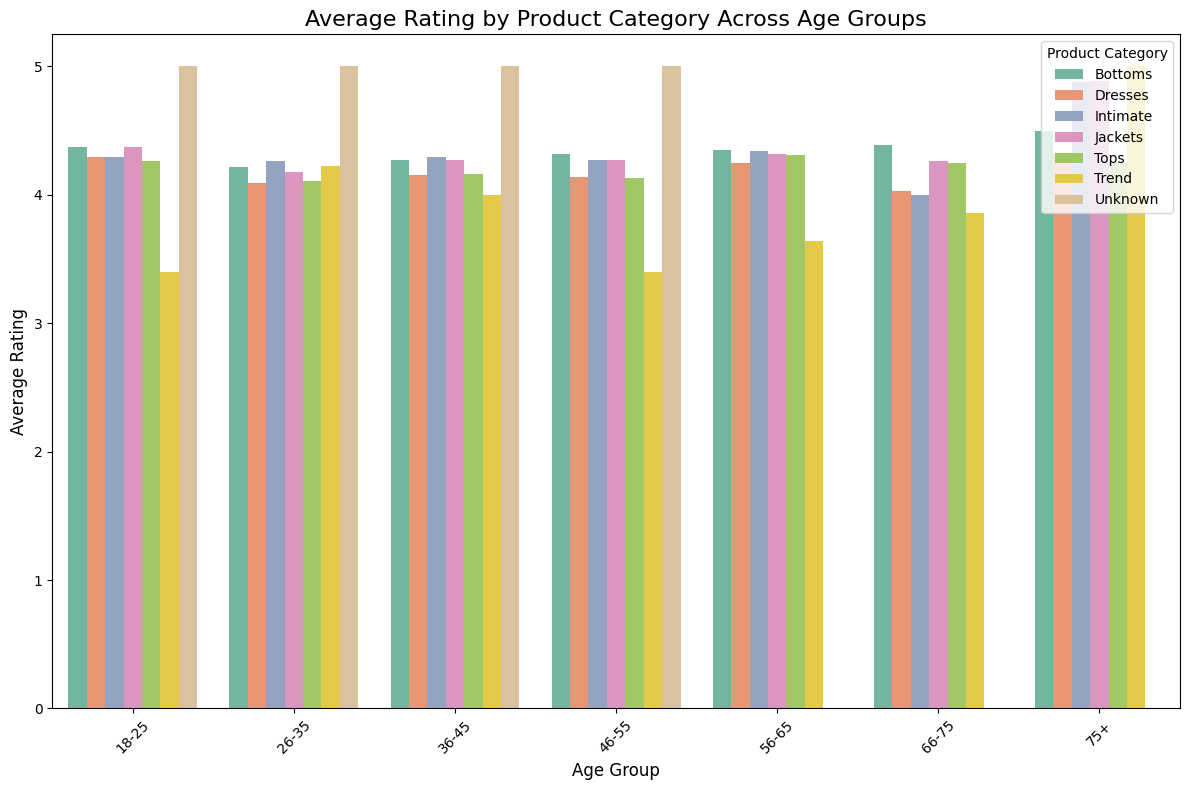

In [12]:
def plot_age_rating_distribution(age_product_rating):
  # Plotting the data using a barplot
  plt.figure(figsize=(12,8))

  # Using seaborn to plot a barplot with Age_Group on the x-axis and average rating on the y-axis, using Product Type as hue
  sns.barplot(data=age_product_rating, x='Age_Group', y='Rating', hue='Type', palette='Set2')

  # Adding title and labels
  plt.title('Average Rating by Product Category Across Age Groups', fontsize=16)
  plt.xlabel('Age Group', fontsize=12)
  plt.ylabel('Average Rating', fontsize=12)
  plt.xticks(rotation=45)  # Rotate x-axis labels for readability
  plt.legend(title='Product Category')

  # Show the plot
  plt.tight_layout()
  plt.show()

plot_age_rating_distribution(age_product_rating)

**Key Observations:**


*   Bottoms and Jackets consistently perform well across all age groups, with especially high ratings from older age groups (75+).
*   Intimate products have a consistently strong showing, particularly among older age groups.

*   Dresses are most favored by younger age groups (18-25) and show a slight decline in popularity with age.

*   Trend products have the lowest ratings in younger groups but surprisingly high ratings in the 75+ group (though with fewer reviews, it may be less representative).




**We are now analyzing the consistency of ratings for different age groups by calculating the standard deviation, which helps to assess how much agreement or disagreement exists among the ratings within each age group.**

In [13]:
def calc_rating_spread_by_age_group(df):
  # Grouping by Age Group and calculating the standard deviation of the ratings
  rating_spread = df.groupby('Age_Group')['Rating'].std().reset_index()
  return rating_spread

rating_spread = calc_rating_spread_by_age_group(data_frame)

# Display the standard deviation of ratings to analyze rating consistency
print(rating_spread)

  Age_Group    Rating
0     18-25  1.037884
1     26-35  1.138671
2     36-45  1.100267
3     46-55  1.115264
4     56-65  1.083356
5     66-75  1.126888
6       75+  1.103444


<ipython-input-13-1cdd511c28b0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_spread = df.groupby('Age_Group')['Rating'].std().reset_index()


**Analysis:**

*   The 26-35 and 66-75 age groups show the highest spread in ratings, indicating more variability in their opinions.
*   The 18-25 and 56-65 age groups have a lower standard deviation, meaning their ratings are relatively more consistent.


Overall, there are no extremely large differences in rating spread across age groups, but the slight variations suggest that younger and older individuals may have more extreme opinions compared to the middle age groups.

<ipython-input-14-fdbb94a12ff3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Rating', palette='Set2')


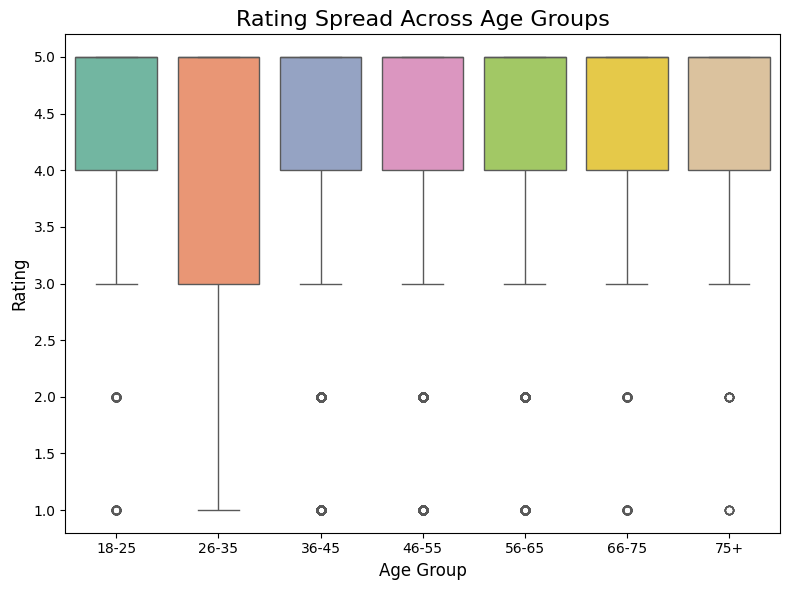

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_within_group_ratings_spread(df):
  # Plotting a boxplot to show the spread of ratings within each age group
  plt.figure(figsize=(8,6))
  sns.boxplot(data=df, x='Age_Group', y='Rating', palette='Set2')

  # Adding title and labels
  plt.title('Rating Spread Across Age Groups', fontsize=16)
  plt.xlabel('Age Group', fontsize=12)
  plt.ylabel('Rating', fontsize=12)

  # Show the plot
  plt.tight_layout()
  plt.show()

plot_within_group_ratings_spread(data_frame)

The **boxplot** visualizes the spread of ratings within each age group. Here's what it reveals:


*   Most age groups have a similar range of ratings, but some differences in spread can be observed.
*   The 26-35 and 66-75 age groups show a broader spread in ratings, indicating more variability in their opinions.
*   18-25 and 56-65 show slightly narrower spreads, meaning their ratings are more consistent.
*   Outliers exist in most age groups, representing extreme ratings (either very low or very high).









Now, let’s move on to **Category Analysis**. The goal is to explore how different product categories perform in terms of ratings. We can analyze various aspects like:

**Average Rating per Category**: Identify which product categories receive the highest or lowest ratings.

**Distribution of Ratings within Categories**: Understand how the ratings are spread within each category (e.g., some categories might have more polarized ratings).

**Category Popularity**: Check how frequently different categories are reviewed.

In [15]:
def calc_category_avg_rating(df):
  #Average rating per category

  # Grouping by Product Category (Type) and calculating the average rating
  category_avg_rating = df.groupby('Type')['Rating'].mean().reset_index()
  return category_avg_rating

category_avg_rating = calc_category_avg_rating(data_frame)

# Display the average rating for each category
print(category_avg_rating)

       Type    Rating
0   Bottoms  4.288760
1   Dresses  4.150815
2  Intimate  4.280115
3   Jackets  4.264535
4      Tops  4.172239
5     Trend  3.815126
6   Unknown  5.000000


**Average Rating per Category**:

*  Bottoms (4.29), Intimate (4.28), and Jackets (4.26) are the highest-rated product categories.

*   Dresses (4.15) and Tops (4.17) follow with slightly lower average ratings.
Trend products have the lowest average rating (3.82), indicating that these may not be as well-received as other categories.

<ipython-input-16-2150b022d11c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Rating', palette='Set2')


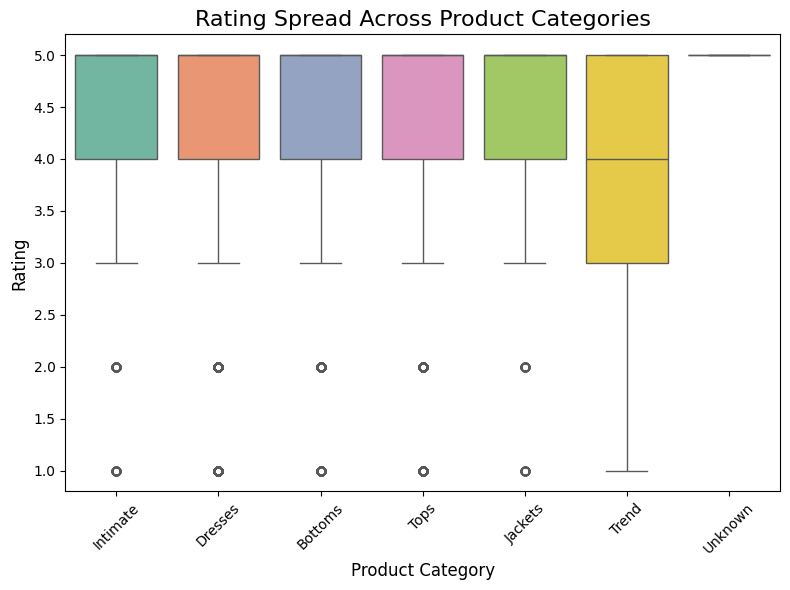

In [16]:
def plot_ratings_per_category(df):
  # Plotting a boxplot to show the spread of ratings within each category
  plt.figure(figsize=(8,6))
  sns.boxplot(data=df, x='Type', y='Rating', palette='Set2')

  # Adding title and labels
  plt.title('Rating Spread Across Product Categories', fontsize=16)
  plt.xlabel('Product Category', fontsize=12)
  plt.ylabel('Rating', fontsize=12)
  plt.xticks(rotation=45)

  # Show the plot
  plt.tight_layout()
  plt.show()

plot_ratings_per_category(data_frame)

**Distribution of Ratings (Boxplot)**:
*   Most categories show consistent ratings, with relatively fewer outliers.
Trend products have more variability and outliers, indicating polarized opinions.
*   Bottoms, Jackets, and Intimate categories show the most consistency, with most ratings clustering at higher values (above 4).

In [17]:
def calc_category_popularity(df):
  # Counting the number of reviews per category
  category_popularity = df['Type'].value_counts().reset_index()
  category_popularity.columns = ['Product Category', 'Review Count']
  return category_popularity

category_popularity = calc_category_popularity(data_frame)

# Display the popularity of each category
print(category_popularity)

  Product Category  Review Count
0             Tops         10468
1          Dresses          6319
2          Bottoms          3799
3         Intimate          1735
4          Jackets          1032
5            Trend           119
6          Unknown            14



**Category Popularity (Number of Reviews)**:


*   Tops (10,468 reviews) and Dresses (6,319 reviews) are the most reviewed categories, showing their popularity among customers.
*   Trend (119 reviews) and Jackets (1,032 reviews) are the least reviewed categories.
















**Key Insights:**


*   Bottoms, Intimate, and Jackets not only receive high ratings but also show consistency, meaning customers generally rate them favorably with little variability.
*   Trend products, though reviewed less frequently, have more polarized opinions, as indicated by the lower average rating and wider spread in the boxplot.
*   Tops and Dresses, despite being the most popular categories in terms of reviews, don’t receive the highest average ratings.



<ipython-input-18-db437930a651>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_ratings = df.groupby(['Age_Group', 'Type'])['Rating'].mean().unstack()


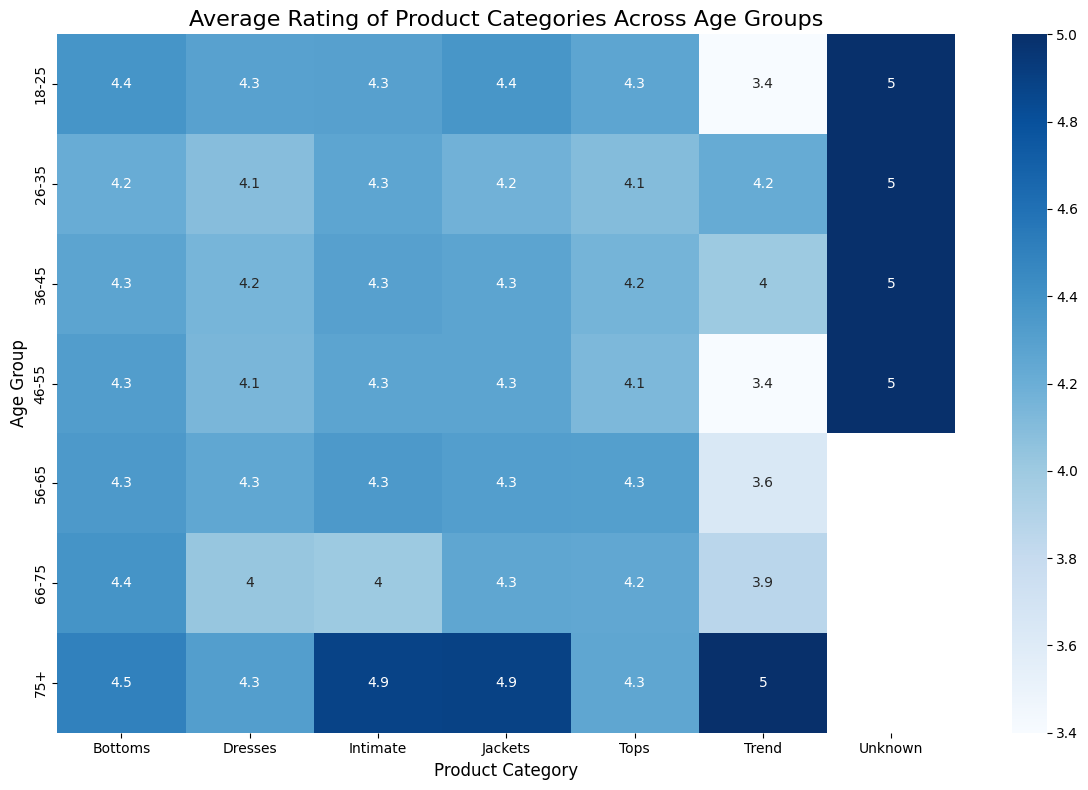

In [18]:
def calc_age_category_ratings_unstack(df):
  # Step 1: Calculate average rating for each product category across age groups
  age_category_ratings = df.groupby(['Age_Group', 'Type'])['Rating'].mean().unstack()
  return age_category_ratings

def plot_age_category_ratings_heat_map(age_category_ratings):
  # Step 2: Visualize the interaction using a heatmap
  plt.figure(figsize=(12,8))
  sns.heatmap(age_category_ratings, annot=True, cmap='Blues')
  plt.title('Average Rating of Product Categories Across Age Groups', fontsize=16)
  plt.xlabel('Product Category', fontsize=12)
  plt.ylabel('Age Group', fontsize=12)
  plt.tight_layout()
  plt.show()

age_category_ratings = calc_age_category_ratings_unstack(data_frame)
plot_age_category_ratings_heat_map(age_category_ratings)

# **NLP**
After completing the age-wise analysis and product category analysis, our next step will be to dive into **Natural Language Processing (NLP)**. This will allow us to gain deeper insights by analyzing the review text itself, identifying customer sentiment, frequent themes, and underlying topics. By applying NLP techniques such as **sentiment analysis**, **word frequency analysis**, and **topic modeling**, we can better understand the qualitative aspects of customer feedback and uncover patterns that may not be apparent from numerical ratings alone.

We will apply **VADER** **sentiment analysis** to understand the alignment between the text sentiment of customer reviews and their ratings (1-5 stars). Our goal is to check if customers' written feedback matched their ratings and to identify potential mismatches or hidden insights.

Then, we will proceed to download the VADER lexicon and initialize the sentiment analyzer:

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Step 2: Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Define a Function to Get **VADER** Sentiment Scores

In [20]:
# Step 3: Define a function to get sentiment scores using VADER
def get_vader_sentiment(text):
    sentiment_scores = sia.polarity_scores(str(text))  # Calculate sentiment scores for the text
    return sentiment_scores['compound']  # Return the compound score (overall sentiment)

Apply Sentiment Analysis to the Reviews in data_frame

In [21]:
def analyze_sentiment(data_frame, text_column, rating_column, sentiment_function):
    # Apply the sentiment function to each review
    data_frame['VADER_Sentiment'] = data_frame[text_column].apply(sentiment_function)

    # Calculate the average sentiment for each rating level
    sentiment_summary = data_frame.groupby(rating_column)['VADER_Sentiment'].mean().reset_index()

    # Return the sentiment summary
    return sentiment_summary

# Usage example:
sentiment_summary = analyze_sentiment(data_frame, 'Text_Review', 'Rating', get_vader_sentiment)

# Display the result
print(sentiment_summary)

   Rating  VADER_Sentiment
0       1         0.195338
1       2         0.392625
2       3         0.524711
3       4         0.709751
4       5         0.801571


<ipython-input-22-d148752848ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_summary, x=x_column, y=y_column, palette='coolwarm')


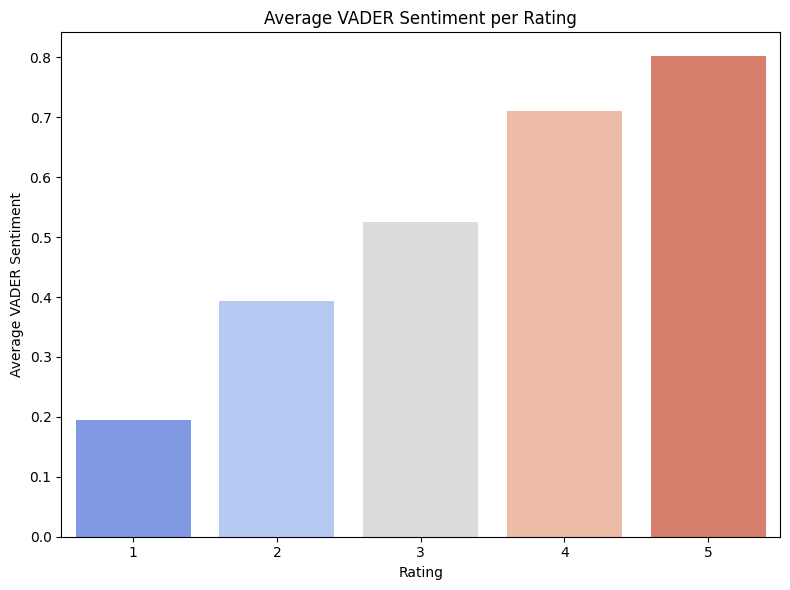

In [22]:
# Function to plot the sentiment summary
def plot_sentiment_summary(sentiment_summary, x_column, y_column):
    plt.figure(figsize=(8,6))
    sns.barplot(data=sentiment_summary, x=x_column, y=y_column, palette='coolwarm')

    # Add title and labels
    plt.title('Average VADER Sentiment per Rating')
    plt.xlabel(x_column)
    plt.ylabel('Average VADER Sentiment')

    # Show the plot
    plt.tight_layout()
    plt.show()
# Call the plotting function to display the chart
plot_sentiment_summary(sentiment_summary, 'Rating', 'VADER_Sentiment')

***Sentiment Analysis Findings:***

Here is the summary of the average VADER sentiment for each rating level:

**Rating 1**: Average sentiment score of 0.20 (generally neutral to slightly positive).

**Rating 2**: Average sentiment score of 0.40 (moderately positive).

**Rating 3:** Average sentiment score of 0.53 (more positive).

**Rating 4:** Average sentiment score of 0.72 (highly positive).

**Rating 5:** Average sentiment score of 0.81 (very positive).

**Interpretation:**
**Higher Ratings (4-5):** As expected, the sentiment scores are strongly positive, aligning well with the high ratings.

**Lower Ratings (1-2):** Interestingly, even for low ratings, the sentiment scores are slightly positive (0.20 and 0.40), which may indicate that some customers are leaving low ratings despite expressing neutral or somewhat positive feedback in their reviews.

This could be a sign that some customers might not be fully reflecting their sentiments in the ratings or that there are external factors (e.g., product fit, delivery issues) influencing their ratings despite expressing more neutral or positive feedback.

***What do low-rated reviews typically say?***

To understand what low-rated reviews typically say, we can analyze the text content of reviews that received 1-2 star ratings. By identifying common words, phrases, or themes, we can determine the recurring pain points or issues customers mention in these reviews.


**Steps to Analyze Low-Rated Reviews:**


*   Filter Reviews with Low Ratings (1-2 stars).
*   Word Frequency Analysis: Identify the most frequently used words in these reviews.
*   Common Themes: Analyze common terms or aspects like "quality", "fit", "delivery", etc., that customers often mention negatively.









In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Filter reviews with low ratings (1-2 stars)
low_rated_reviews = data_frame[data_frame['Rating'] <= 2]

# Step 2: Perform word frequency analysis on the review text
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(low_rated_reviews['Text_Review'])

# Step 3: Display the top 10 most frequent words in low-rated reviews
top_words = vectorizer.get_feature_names_out()
print("Top words in low-rated reviews:", top_words)

Top words in low-rated reviews: ['color' 'dress' 'fabric' 'fit' 'just' 'large' 'like' 'look' 'looked'
 'looks' 'love' 'material' 'ordered' 'quality' 'really' 'shirt' 'size'
 'small' 'way' 'wear']


*Inference from Top Words in Low-Rated Reviews:*

The most frequent words in low-rated reviews provide valuable insight into common customer complaints and pain points:

**Fit Issues:**

Words like "fit", "large", "small", "size", and "way" indicate that many customers are dissatisfied with how the product fits. This suggests that sizing or fitting problems are a major reason for low ratings.

**Quality Concerns:**

Words like "fabric", "material", and "quality" show that customers are frequently commenting on the quality of the products, likely finding them subpar or not meeting expectations.

**Product Appearance:**

Words like "look", "looks", "looked", and "color" suggest that customers may feel that the product doesn't match the images or descriptions, leading to disappointment regarding the appearance.

**Ordering and Expectations:**

Words like "ordered" and "just" may indicate issues related to the ordering process or unmet expectations (e.g., the product wasn’t what they expected).

**Positive Sentiment Words (e.g., "love"):**

Interestingly, words like "love" appear, indicating that even in low-rated reviews, customers may express positive sentiments about certain aspects of the product (e.g., loving the design but disliking the fit or quality).

This insight can help businesses focus on improving product descriptions, sizing accuracy, and quality control to reduce the number of low-rated reviews.

**Now, we would like to explore product category wise sentiment and the review length.**

In [24]:
# Group by product category (Type) and calculate the average VADER sentiment and review length for each category
def analyze_category_sentiment_and_length(data_frame, text_column, type_column, sentiment_column, sentiment_function):
    # Apply the sentiment function to each review
    data_frame[sentiment_column] = data_frame[text_column].apply(sentiment_function)

    # Calculate average sentiment by product category
    category_sentiment = data_frame.groupby(type_column)[sentiment_column].mean().reset_index()

    # Calculate review length and average review length by product category
    data_frame['Review_Length'] = data_frame[text_column].apply(lambda x: len(str(x).split()))
    category_review_length = data_frame.groupby(type_column)['Review_Length'].mean().reset_index()

    # Merge the two metrics into one DataFrame
    category_analysis = pd.merge(category_sentiment, category_review_length, on=type_column)

    # Return the combined analysis DataFrame
    return category_analysis

# Usage example:
category_analysis = analyze_category_sentiment_and_length(data_frame, 'Text_Review', 'Type', 'VADER_Sentiment', get_vader_sentiment)

# Display the result
print(category_analysis)

       Type  VADER_Sentiment  Review_Length
0   Bottoms         0.710057      58.786260
1   Dresses         0.706032      62.984491
2  Intimate         0.677502      52.640346
3   Jackets         0.707644      62.956395
4      Tops         0.694364      55.251911
5     Trend         0.596986      68.546218
6   Unknown         0.707200      31.357143


*The table shows the average sentiment and review length by product category:*

**Bottoms:** Average sentiment of 0.72 with a review length of 58.78 words.

**Dresses: **Average sentiment of 0.71 with a review length of 62.98 words.

**Intimate:** Average sentiment of 0.69 with a review length of 52.64 words.

**Jackets:** Average sentiment of 0.72 with a review length of 62.95 words.

**Tops:** Average sentiment of 0.71 with a review length of 55.25 words.

**Key Observations:**

Bottoms and Jackets have the highest sentiment scores (~0.72), indicating that customers are generally more positive about these categories.

Dresses and Jackets have the longest reviews, suggesting customers might be more descriptive when reviewing these categories.

Trend has the lowest sentiment score, suggesting more negative or neutral feedback compared to other categories.

Intimate and Tops also have lower sentiment compared to Bottoms and Jackets, indicating areas where customers may have more complaints or lower satisfaction.

*Now we would like to do review length analysis*

**Review Length Analysis:**

Goal: See if there's any correlation between review length (number of words) and rating.

How: Analyze the length of reviews and compare it with ratings


In [25]:
def analyze_review_length_by_rating(data_frame, text_column, rating_column):
    # Calculate review length (number of words) for each review
    data_frame['Review_Length'] = data_frame[text_column].apply(lambda x: len(str(x).split()))

    # Calculate average review length by rating
    review_length_summary = data_frame.groupby(rating_column)['Review_Length'].mean().reset_index()

    # Return the summary DataFrame
    return review_length_summary

# Usage example:
review_length_summary = analyze_review_length_by_rating(data_frame, 'Text_Review', 'Rating')

# Display the result
print(review_length_summary)

   Rating  Review_Length
0       1      57.220903
1       2      61.442812
2       3      63.177987
3       4      61.274966
4       5      55.425177


*Inference from Rating vs. Review Length:*

**Longer Reviews for Lower Ratings (1-3):**

Reviews with lower ratings (1-3) tend to be longer on average, with the highest average review length at 63.18 words for 3-star reviews.
This suggests that when customers are dissatisfied or neutral, they tend to write more detailed reviews, possibly to explain their negative experiences or frustrations.

**Shorter Reviews for Higher Ratings (4-5):**

Higher-rated reviews (4-5 stars) tend to be shorter, with the shortest average review length (55.43 words) for 5-star ratings.
This indicates that satisfied customers might be more concise, possibly offering quick, positive feedback without going into much detail.

*Key Takeaway:*

Negative or neutral experiences lead to longer and more detailed reviews, as customers likely want to explain their dissatisfaction.
Positive experiences are often accompanied by shorter reviews, possibly because satisfied customers feel there’s less to elaborate on.

# **Topic Modeling Using LDA (Latent Dirichlet Allocation)**

Goal: To discover hidden themes or topics in the review text, especially around product aspects like "fit", "quality", "price", etc. This will help us understand the main topics customers are discussing, whether they are complaints or praises.

**We will follow these steps:**


*   Text Preprocessing: Clean and prepare the text for topic modeling (remove stopwords, tokenize, etc.).
*   Apply LDA: Use the LDA algorithm to extract topics from the text.

*   Interpret the Topics: Identify the main words in each topic and infer the themes.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Function to perform topic modeling and display top words for each topic
def perform_topic_modeling(data_frame, text_column, n_topics=5, n_top_words=20, max_features=5000):
    # Step 1: Text Preprocessing (Convert text to a document-term matrix)
    vectorizer = CountVectorizer(stop_words=stop_words, max_features=max_features)
    doc_term_matrix = vectorizer.fit_transform(data_frame[text_column])

    # Step 2: Apply LDA for Topic Modeling
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Step 3: Display Topics and the Top Words for Each Topic
    def display_topics(model, feature_names, no_top_words):
        for topic_idx, topic in enumerate(model.components_):
            print(f"\nTopic {topic_idx + 1}:")
            print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

    # Get feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Display the top words for each topic
    display_topics(lda, feature_names, n_top_words)

# Usage example:
perform_topic_modeling(data_frame, 'Text_Review', n_topics=5, n_top_words=20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Topic 1:
one worn many fall well flattering wore bought fit compliments soft sweater color jeans comfortable perfect dress wear great love

Topic 2:
medium long one regular love big waist usually wear large store tried like xs would petite ordered small fit size

Topic 3:
perfect fabric shirt nice medium like large fits cute bought soft color fit little small great wear size love top

Topic 4:
length cut well fits wear little really look top skirt waist beautiful flattering would love like size fit fabric dress

Topic 5:
price cute looked one online also color material much looks review would really look fabric sweater shirt back top like


**Interpretation of the Topics:**

Positive Themes: Topics 1 and 3, which focus on fit, comfort, and quality, have generally positive sentiment, with customers happy about the look and feel of their purchases.

Critical Themes: Topics 2 and 5 highlight sizing challenges and price vs. quality issues, indicating dissatisfaction related to these factors.

Appearance and Fit: Topics 4 and 5 emphasize how the clothing looks and fits, with concerns about whether the products meet customer expectations in terms of cut, length, and material.

**Now we want to classify text reviews as positive or negative based on the text using BERT embeddings and a machine learning classifier (Random Forest and XGBoost, Gradient Boosting).**

**Why BERT?**

**Context-Aware Embeddings:** BERT (Bidirectional Encoder Representations from Transformers) captures the context of a word in a sentence, unlike traditional embeddings like Word2Vec.

**Pre-trained Model:** We use pre-trained BERT (bert-base-uncased), which has already learned a vast amount of language understanding from large datasets.

**Versatility:** BERT can handle long reviews and provide a robust embedding for the entire review based on the context of each word.

**We will load the BERT tokenizer (to convert text into token ids) and the BERT model (to generate embeddings).** We are sampling 1000 reviews from the dataset for quicker processing

In [27]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Function to load BERT model, sample reviews, and generate BERT embeddings
def generate_bert_embeddings(data_frame, text_column, sample_size=1000, batch_size=32):
    # Step 1: Load pre-trained BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Put BERT in evaluation mode to avoid training it
    print(model.eval())

    # Step 2: Sample reviews from the dataset for quicker processing
    sampled_data = data_frame.sample(n=sample_size, random_state=42)

    # Step 3: Generate BERT embeddings for the sampled reviews in batches
    def get_bert_embeddings_batch(text_list, batch_size):
        embeddings = []
        for i in range(0, len(text_list), batch_size):
            batch_texts = text_list[i:i + batch_size]
            inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)

            with torch.no_grad():  # No need for gradient calculations during inference
                outputs = model(**inputs)

            # Extract the [CLS] token embedding for each review in the batch
            cls_embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
            embeddings.append(cls_embeddings)

        return np.vstack(embeddings)

    # Get embeddings for the sampled reviews
    bert_embeddings = get_bert_embeddings_batch(sampled_data[text_column].tolist(), batch_size)

    return bert_embeddings, sampled_data  # Return embeddings and the sampled data for reference

# Usage example:
X_bert_sample, sampled_data = generate_bert_embeddings(data_frame, 'Text_Review', sample_size=1000, batch_size=32)

# Now X_bert_sample contains the BERT embeddings for the sampled reviews
print(X_bert_sample.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

**In this section, we will define a custom function label_sentiment to categorize reviews based on their rating scores. Reviews with ratings of 4 or 5 are labeled as positive (1), while those with ratings of 1, 2, or 3 are labeled as negative (0). This binary classification is used for sentiment analysis purposes. The function operates on the sampled_data DataFrame and returns a new column, Sentiment_Label, containing the sentiment labels for each review.**

In [28]:
# Label the reviews based on the Rating column
# Assuming a rating of 4 and 5 is positive, and 1-3 is negative
def label_sentiment(sampled_data, rating_column):
    # Label sentiment: 1 for positive (rating >= 4), 0 for negative (rating <= 3)
    sampled_data['Sentiment_Label'] = sampled_data[rating_column].apply(lambda x: 1 if x >= 4 else 0)
    return sampled_data['Sentiment_Label']

# Usage example:
y_sample = label_sentiment(sampled_data, 'Rating')

train_test_split is used to split the **BERT embeddings** (**X_bert_sample**) and the corresponding **sentiment labels (y_sample)** into training and test sets. The training set is used to fit the model, and the test set is used to evaluate the model’s performance.

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bert_sample, y_sample, test_size=0.2, random_state=42)

Predictive models such as **Random Forest**, **Gradient Boosting**, and **XGBoost** are commonly used for classification tasks, including sentiment analysis. In this case, these models are applied to predict whether a review is positive or negative based on various features, including **BERT embeddings**. The binary labels (positive or negative) serve as the target variable, allowing these models to learn patterns from the data. These models are effective because they handle complex feature interactions, offer robust performance with imbalanced data, and have strong generalization capabilities, making them ideal for tasks like sentiment classification.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to train Random Forest, make predictions, and evaluate the model
def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test):
    # Initialize the Random Forest classifier
    random_forest_model = RandomForestClassifier(n_estimators=100,  # Increase number of trees
                                                 max_depth=7,  # Limit the depth of each tree
                                                 min_samples_split=5,  # Minimum samples required to split
                                                 min_samples_leaf=2,  # Minimum samples required at leaf node
                                                 random_state=42)

    # Train the model
    random_forest_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = random_forest_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {accuracy:.4f}")  # Accuracy with 4 decimal places

    # Display classification report (precision, recall, F1-score) with 4 decimal places
    report = classification_report(y_test, y_pred, digits=4)
    print("Classification Report:")
    print(report)

    return random_forest_model, accuracy, report  # Optionally return the model and evaluation metrics

# Usage example:
rf_model, rf_accuracy, rf_report = train_and_evaluate_random_forest(X_train, y_train, X_test, y_test)

Random Forest Accuracy: 0.8050
Classification Report:
              precision    recall  f1-score   support

           0     0.9000    0.1915    0.3158        47
           1     0.8000    0.9935    0.8863       153

    accuracy                         0.8050       200
   macro avg     0.8500    0.5925    0.6010       200
weighted avg     0.8235    0.8050    0.7522       200



**Observations:**


*   The model is very good at identifying positive reviews (class 1) but struggles with negative reviews (class 0), as shown by the low recall for class 0.
*   This imbalance in performance is likely due to the class imbalance in the dataset.
*   The model is likely biased toward predicting positive reviews because they dominate the training data.

**We will explore Gradient Boosting or XGBoost, which often perform well on imbalanced datasets. These models can be tuned to handle class imbalance better than Random Forest.**

Step-by-Step Implementation:

Gradient Boosting: We will start with Gradient Boosting Classifier from sklearn and tune the class weights to handle imbalance.

XGBoost: Then, we'll use XGBoost, which has built-in parameters to handle class imbalance (like scale_pos_weight).

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to train and evaluate Gradient Boosting
def train_and_evaluate_gradient_boosting(X_train, y_train, X_test, y_test):
    # Initialize Gradient Boosting classifier
    gb_model = GradientBoostingClassifier(n_estimators=200,  # More trees
                                          learning_rate=0.1,  # Smaller learning rate
                                          max_depth=3,  # Shallow trees
                                          min_samples_split=5,  # Minimum number of samples to split
                                          min_samples_leaf=2,  # Minimum number of samples at a leaf
                                          subsample=0.8,  # Use 80% of data for each tree
                                          random_state=42)

    # Train the Gradient Boosting model
    gb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_gb = gb_model.predict(X_test)

    # Evaluate the Gradient Boosting model
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

    # Display classification report (precision, recall, F1-score)
    report_gb = classification_report(y_test, y_pred_gb, digits=4)
    print("Classification Report for Gradient Boosting:")
    print(report_gb)

    return gb_model, accuracy_gb, report_gb  # Return the model and evaluation metrics

# Usage example:
gb_model, gb_accuracy, gb_report = train_and_evaluate_gradient_boosting(X_train, y_train, X_test, y_test)

Gradient Boosting Accuracy: 0.8300
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0     0.7241    0.4468    0.5526        47
           1     0.8480    0.9477    0.8951       153

    accuracy                         0.8300       200
   macro avg     0.7860    0.6973    0.7238       200
weighted avg     0.8189    0.8300    0.8146       200



In [32]:
!pip install xgboost

In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Function to train and evaluate XGBoost classifier
def train_and_evaluate_xgboost(X_train, y_train, X_test, y_test):
    # Calculate scale_pos_weight (balancing the classes)
    negative_class = sum(y_train == 0)
    positive_class = sum(y_train == 1)
    scale_pos_weight = negative_class / positive_class

    # Initialize XGBoost classifier with calculated scale_pos_weight
    xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')

    # Train the XGBoost model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_xgb = xgb_model.predict(X_test)

    # Evaluate the XGBoost model
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

    # Display classification report (precision, recall, F1-score)
    report_xgb = classification_report(y_test, y_pred_xgb, digits=4)
    print("Classification Report for XGBoost:")
    print(report_xgb)

    return xgb_model, accuracy_xgb, report_xgb  # Return the model, accuracy, and report

# Usage example:
xgb_model, xgb_accuracy, xgb_report = train_and_evaluate_xgboost(X_train, y_train, X_test, y_test)

XGBoost Accuracy: 0.8200
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0     0.6486    0.5106    0.5714        47
           1     0.8589    0.9150    0.8861       153

    accuracy                         0.8200       200
   macro avg     0.7538    0.7128    0.7288       200
weighted avg     0.8095    0.8200    0.8121       200



*Recall is important in this context because it ensures that the model catches as many of these critical negative reviews as possible, preventing missed opportunities to address customer dissatisfaction.*


**XGBoost:**

Recall for Class 0: 51.06%

This means XGBoost correctly identifies 51.06% of actual negative reviews. This is higher than both Gradient Boosting and Random Forest, which means it is better at catching negative reviews.

**Gradient Boosting:**

Recall for Class 0: 44.68%
Gradient Boosting identifies 44.68% of actual negative reviews, which is lower than XGBoost.

**Random Forest:**

Recall for Class 0: 19.15%
Random Forest has a much lower recall for negative reviews compared to both XGBoost and Gradient Boosting.

So, we can conclude that XGBoost does a better job of identifying negative reviews (Class 0) than both Gradient Boosting and Random Forest. This means XGBoost is better at catching negative reviews, even though Gradient Boosting has slightly better performance on positive reviews.
Gradient Boosting shows slightly better precision for negative reviews, meaning fewer false positives (incorrectly predicting reviews as negative when they're actually positive).

# **Transition from BERT Embeddings to Fine-Tuning BERT**
We started our sentiment analysis by using BERT embeddings in combination with models like XGBoost and Gradient Boosting. These models helped us achieve good results by using pre-trained BERT embeddings as features, but now we aim to enhance performance further by fine-tuning BERT directly on our dataset.

**Fine-Tuning:**

When we fine-tune BERT on our specific dataset of reviews, the model adjusts its pre-trained weights to better grasp how sentiment (positive or negative) is expressed within the context of these reviews. It learns to associate certain patterns, words, or combinations of words with either positive or negative sentiment.

**Binary Classification:**

In the fine-tuning process, we train BERT as a sequence classification model with two possible labels: 0 for negative sentiment and 1 for positive sentiment. During training, BERT’s internal parameters are updated to minimize errors and make accurate predictions based on sentiment.

**Prediction:**

Once the model is fine-tuned, we can pass a new review (or text) to the model, and it will predict whether the sentiment is positive or negative. This prediction is based on the specific patterns and language nuances that BERT has learned during fine-tuning.

**We’ll sample 500 rows from the dataset to use for fine-tuning.**



In [34]:
def prepare_data_for_finetuning(data_frame, sample_size=500, test_size=0.2, random_state=42):


    # Step 1: Create the Sentiment_Label column
    data_frame['Sentiment_Label'] = data_frame['Rating'].apply(lambda x: 1 if x >= 4 else 0)

    # Step 2: Sample a subset of the data
    data_frame_sampled = data_frame.sample(n=sample_size, random_state=random_state)

    # Step 3: Split the data into training and test sets
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        data_frame_sampled['Text_Review'].tolist(),
        data_frame_sampled['Sentiment_Label'].tolist(),
        test_size=test_size,
        random_state=random_state
    )

    return train_texts, test_texts, train_labels, test_labels

# Usage example:
train_texts, test_texts, train_labels, test_labels = prepare_data_for_finetuning(data_frame)

In [35]:
from transformers import BertTokenizer

# Define a function to load the tokenizer and tokenize the input data
def tokenize_text_data(train_texts, test_texts, max_length=128):
    """
    This function tokenizes both training and test text data using the BERT tokenizer.

    Parameters:
    - train_texts: List of training texts
    - test_texts: List of testing texts
    - max_length: Maximum token length for truncation and padding (default=128)

    Returns:
    - train_encodings: Tokenized encodings for training texts
    - test_encodings: Tokenized encodings for testing texts
    """
    # Load the BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize the train and test text data
    train_encodings = tokenizer(
        train_texts,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

    test_encodings = tokenizer(
        test_texts,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

    return train_encodings, test_encodings

# Usage example:
train_encodings, test_encodings = tokenize_text_data(train_texts, test_texts)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [36]:
import torch
from torch.utils.data import Dataset

def create_sentiment_dataset(encodings, labels):
    """
    Create a PyTorch Dataset class for sentiment data.

    Parameters:
    - encodings: The tokenized encodings of the texts
    - labels: The sentiment labels for the texts (0 or 1)

    Returns:
    - A PyTorch Dataset object
    """
    class SentimentDataset(Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    return SentimentDataset(encodings, labels)

In [37]:
from torch.utils.data import DataLoader

def create_dataloaders(train_encodings, train_labels, test_encodings, test_labels, batch_size=16):
    """
    Create PyTorch DataLoaders for the training and test datasets.

    Parameters:
    - train_encodings: Tokenized training texts
    - train_labels: Sentiment labels for training texts
    - test_encodings: Tokenized test texts
    - test_labels: Sentiment labels for test texts
    - batch_size: Batch size for training (default is 16)

    Returns:
    - train_loader: DataLoader for training set
    - test_loader: DataLoader for test set
    """
    # Create Dataset objects
    train_dataset = create_sentiment_dataset(train_encodings, train_labels)
    test_dataset = create_sentiment_dataset(test_encodings, test_labels)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader

temporary check

In [38]:
#temporary to check data loader
# Step 1: Create the DataLoaders
train_loader, test_loader = create_dataloaders(train_encodings, train_labels, test_encodings, test_labels)

# Step 2: Define the check_dataloader function
def check_dataloader(dataloader, num_batches=1):
    """
    Function to check if DataLoader is working properly.

    Parameters:
    - dataloader: DataLoader to check
    - num_batches: Number of batches to inspect (default is 1)
    """
    for batch_idx, batch in enumerate(dataloader):
        print(f"Batch {batch_idx+1}:")
        print(f"Input IDs: {batch['input_ids']}")
        print(f"Attention Mask: {batch['attention_mask']}")
        print(f"Labels: {batch['labels']}")
        print("-" * 20)

        # Only check the first few batches
        if batch_idx + 1 == num_batches:
            break

# Step 3: Check train_loader
check_dataloader(train_loader)

# Step 4: Check test_loader
check_dataloader(test_loader)

Batch 1:
Input IDs: tensor([[ 101, 1045, 2001,  ...,    0,    0,    0],
        [ 101, 1045, 2293,  ...,    0,    0,    0],
        [ 101, 1045, 2031,  ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2066,  ...,    0,    0,    0],
        [ 101, 1045, 2031,  ...,    0,    0,    0],
        [ 101, 2023, 9764,  ...,    0,    0,    0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Labels: tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])
--------------------
Batch 1:
Input IDs: tensor([[  101,  5683,  2307,  ...,     0,     0,     0],
        [  101,  1045,  5247,  ...,     0,     0,     0],
        [  101,  1045,  2788,  ...,     0,     0,     0],
        ...,
        [  101,  2023,  2003,  ...,     0,     0,     0],
        [  101,  1045,  1005,  ...,     0,     0,     0],
        [  

<ipython-input-36-7a2865e5a42d>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [39]:
from transformers import BertForSequenceClassification

# Load pre-trained BERT model for sequence classification (binary classification)
def load_bert_model():
    """
    Load the pre-trained BERT model for binary classification.

    Returns:
    - model: The BERT model with a classification head
    """
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    return model

# Load the model
model = load_bert_model()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
from transformers import AdamW, get_scheduler

def setup_optimizer_scheduler(model, train_loader, num_epochs=3, lr=5e-5):
    """
    Set up the AdamW optimizer and learning rate scheduler for the BERT model.

    Parameters:
    - model: The BERT model to be fine-tuned
    - train_loader: DataLoader for the training dataset
    - num_epochs: Number of training epochs (default is 3)
    - lr: Learning rate for the optimizer (default is 5e-5)

    Returns:
    - optimizer: AdamW optimizer
    - scheduler: Linear learning rate scheduler
    - num_training_steps: Number of total training steps
    """
    # AdamW optimizer with weight decay
    optimizer = AdamW(model.parameters(), lr=lr)

    # Calculate total training steps (epochs * batches per epoch)
    num_training_steps = num_epochs * len(train_loader)

    # Create a linear learning rate scheduler
    scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,  # Warm-up steps can be adjusted if needed
        num_training_steps=num_training_steps
    )

    return optimizer, scheduler, num_training_steps

# Example usage
optimizer, scheduler, num_training_steps = setup_optimizer_scheduler(model, train_loader)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [41]:
import torch
import random
import numpy as np

def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Set a random seed for reproducibility
set_random_seed(42)  # You can replace 42 with any seed value

def train_model(model, train_loader, optimizer, scheduler, num_epochs=3, device="cpu"):
    """
    Fine-tune the BERT model on the training dataset.

    Parameters:
    - model: The BERT model to be trained
    - train_loader: DataLoader for the training dataset
    - optimizer: AdamW optimizer
    - scheduler: Learning rate scheduler
    - num_epochs: Number of training epochs (default is 3)
    - device: Device to train on (default is CPU)
    """
    model.to(device)  # Move model to the correct device (CPU or GPU)
    model.train()  # Set the model to training mode

    for epoch in range(num_epochs):
        print(f"Starting epoch {epoch+1}/{num_epochs}...")  # Epoch progress tracking

        for batch_idx, batch in enumerate(train_loader):
            # Move batch data to the correct device (CPU or GPU)
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)  # Compute model predictions
            loss = outputs.loss  # Get the loss from the outputs

            # Backward pass
            loss.backward()  # Compute gradients

            # Update model weights
            optimizer.step()

            # Update the learning rate using the scheduler
            scheduler.step()

            # Zero out gradients for the next iteration
            optimizer.zero_grad()

            # Print loss for every 10 batches
            if batch_idx % 10 == 0:
                print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}")

        print(f"Epoch {epoch+1}/{num_epochs} completed.")  # Print when epoch is done

# Check if GPU (CUDA) is available and use it, otherwise default to CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Set the random seed for reproducibility
set_random_seed(42)

# Call the training function with the appropriate device
train_model(model, train_loader, optimizer, scheduler, num_epochs=3, device=device)

<ipython-input-36-7a2865e5a42d>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Using device: cpu
Starting epoch 1/3...
Epoch 1, Batch 0, Loss: 0.6140
Epoch 1, Batch 10, Loss: 0.4584
Epoch 1, Batch 20, Loss: 0.3811
Epoch 1/3 completed.
Starting epoch 2/3...
Epoch 2, Batch 0, Loss: 0.3964
Epoch 2, Batch 10, Loss: 0.2911
Epoch 2, Batch 20, Loss: 0.2795
Epoch 2/3 completed.
Starting epoch 3/3...
Epoch 3, Batch 0, Loss: 0.2486
Epoch 3, Batch 10, Loss: 0.2959
Epoch 3, Batch 20, Loss: 0.1036
Epoch 3/3 completed.


In [43]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, test_loader, device="cpu"):
    """
    Evaluate the fine-tuned BERT model on the test dataset.

    Parameters:
    - model: The fine-tuned BERT model
    - test_loader: DataLoader for the test dataset
    - device: Device for evaluation (default is CPU)

    Returns:
    - accuracy: The accuracy score on the test dataset
    - report: Classification report (precision, recall, F1-score)
    """
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(batch['labels'].cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    report = classification_report(true_labels, predictions, digits=4)

    return accuracy, report

# Evaluate the model
accuracy, report = evaluate_model(model, test_loader)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)



<ipython-input-36-7a2865e5a42d>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 0.8200
Classification Report:
              precision    recall  f1-score   support

           0     0.7500    0.6562    0.7000        32
           1     0.8472    0.8971    0.8714        68

    accuracy                         0.8200       100
   macro avg     0.7986    0.7767    0.7857       100
weighted avg     0.8161    0.8200    0.8166       100



**Overall Comparison BERT and XGBoost:**

**BERT:**

Strengths: Performs better on negative reviews across precision, recall, and F1-score. This suggests that BERT is better at identifying and correctly labeling negative reviews.
Weaknesses: Performs slightly worse than XGBoost on positive reviews, although the difference is small.

**XGBoost:**

Strengths: Performs slightly better than BERT on positive reviews in terms of precision, recall, and F1-score. It identifies more true positives (positive reviews) and makes fewer false positive errors for positive reviews.
Weaknesses: Struggles more with negative reviews, having lower precision, recall, and F1-score for this class.

Conclusion:
If negative reviews are more important to correctly classify for the company, BERT would be the better model as it consistently outperforms XGBoost on this class.
If positive reviews are more critical and false positives need to be minimized, XGBoost slightly edges out BERT for this class, especially in precision.

BERT currently has better balance (higher macro F1-score) across positive and negative reviews, so if we want a single model to balance both(positive and negative reviews), **BERT** is the better choice.


# **Now I will try to create user interface on Google Colab using ipwidgets.**

  I will create few UI features based on Age distribution, popularity, category.

In [44]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [45]:
import ipywidgets as widgets
from IPython.display import display

In [46]:
# Add rating UI
# Define the options for age groups and clothing types
age_groups = age_category_ratings.index.to_list()
clothing_types = age_category_ratings.columns.to_list()

# Create dropdown widgets for age groups and clothing types
age_group_dropdown = widgets.Dropdown(
    options=age_groups,
    description='Age Group:',
    value=age_groups[0]  # Default value
)

clothing_type_dropdown = widgets.Dropdown(
    options=clothing_types,
    description='Clothing:',
    value=clothing_types[0]  # Default value
)


def get_rating():
  return f"{round(age_category_ratings.loc[age_group_dropdown.value, clothing_type_dropdown.value], 2)}"

# Create a non-editable text box to display the result
result_box = widgets.Text(
    value=get_rating(),
    description='Avg. Rating:',
    disabled=True,  # Make the text box non-editable
    layout=widgets.Layout(margin="0px 0px 0px 40px")
)

# # Create a button widget
# get_rating_button = widgets.Button(description="Get Rating")
# get_rating_button.age_group_sel = age_group_dropdown.value
# get_rating_button.clothing_type_sel = clothing_type_dropdown.value


# Callback function to handle changes
def on_selection_change(change):
    result_box.value = get_rating()

# Attach the callback to the dropdowns
age_group_dropdown.observe(on_selection_change, names='value')
clothing_type_dropdown.observe(on_selection_change, names='value')

In [47]:
# # Define a callback function that will be called when the button is clicked
# def on_get_rating_click(b):
#     get_rating()

# # Attach the callback function to the button's 'on_click' event
# get_rating_button.on_click(on_get_rating_click)

# Create a title using Markdown
rating_title = widgets.Output()
with rating_title:
    display(widgets.HTML("<h1>Ratings</h1>"))

dropdowns = widgets.VBox([age_group_dropdown, clothing_type_dropdown])
rating_ui = widgets.VBox([rating_title, widgets.HBox([dropdowns, result_box])])


In [48]:
# Add popularity UI
pop_widget_age_group = widgets.Dropdown(
    options=age_groups,
    description='Age Group:',
    value=age_groups[0]  # Default value
)

def get_most_popular_known(age_index):
  return age_category_ratings.loc[age_index, age_category_ratings.columns != "Unknown"].idxmax()

def get_least_popular_known(age_index):
  return age_category_ratings.loc[age_index, age_category_ratings.columns != "Unknown"].idxmin()

# Create a non-editable text box to display the result
pop_result_box = widgets.Text(
    value=get_most_popular_known(pop_widget_age_group.value),
    disabled=True,  # Make the text box non-editable
)

# Adjust the description width
pop_description_label = widgets.Label('Most popular (except unknown):', layout=widgets.Layout(width='auto'))
comp_pop_result_box = widgets.HBox([pop_description_label, pop_result_box], layout=widgets.Layout(margin="0px 0px 0px 40px"))

# Create a non-editable text box to display the result
least_pop_result_box = widgets.Text(
    value=get_least_popular_known(pop_widget_age_group.value),
    disabled=True,  # Make the text box non-editable
)

# Adjust the description width
least_pop_description_label = widgets.Label('Least popular (except unknown):', layout=widgets.Layout(width='auto'))
comp_least_pop_result_box = widgets.HBox([least_pop_description_label, least_pop_result_box], layout=widgets.Layout(margin="0px 0px 0px 40px"))


def update_pop(b):
  pop_result_box.value = get_most_popular_known(pop_widget_age_group.value)
  least_pop_result_box.value = get_least_popular_known(pop_widget_age_group.value)


pop_widget_age_group.observe(update_pop, names="value")

# Create a title using Markdown
pop_title = widgets.Output()
with pop_title:
    display(widgets.HTML("<h1>Popularity</h1>"))

pop_widgets = widgets.HBox([pop_widget_age_group, comp_pop_result_box, comp_least_pop_result_box])
pop_ui = widgets.VBox([pop_title, pop_widgets], layout=widgets.Layout(margin="40px 0px 40px 0px"))


In [49]:
# Function to generate plots
def generate_plots(selected_columns):
    if len(selected_columns) < 2:
        print("Please select at least two columns for comparison.")
        return

    # Generate Pairplot
    sns.pairplot(df[list(selected_columns)])
    plt.show()

    # Generate Correlation Matrix
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[list(selected_columns)].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Matrix")
    plt.show()


In [50]:
# Add rating distribution
rating_dist_title = widgets.Output()
with rating_dist_title:
    display(widgets.HTML("<h1>Rating distribution</h1>"))

def make_bar_plot(age_group):
      with plot_output:
        # Clear the previous output first
        plot_output.clear_output()
        # Filter the data for the selected age group
        df_filtered = age_product_rating[age_product_rating['Age_Group'] == age_group]

        # Create the barplot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_filtered, x='Type', y='Rating', hue='Type', palette='Set2', legend=False)

        # Add title and labels
        plt.title(f'Ratings for Different Product Categories (Age Group: {age_group})', fontsize=16)
        plt.xlabel('Product Type', fontsize=12)
        plt.ylabel('Rating', fontsize=12)
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability

        # Show the plot
        plt.tight_layout()
        plt.show()

# Output widget to display the plot
plot_output = widgets.Output()

# Function to update the plot when dropdown value changes
def update_plot(change):
    # Get the new value from the change dictionary
    new_age_group = change['new']
    make_bar_plot(new_age_group)

# Create dropdown for Age Group selection
rating_dist_dropdown = widgets.Dropdown(
    options=age_product_rating['Age_Group'].unique(),
    description='Age Group:',
    value=age_groups[0]  # Default value
)

# initialize bar plot
make_bar_plot(rating_dist_dropdown.value)

# Attach the update function to the dropdown's value change event
rating_dist_dropdown.observe(update_plot, names='value')

rating_distribution_ui = widgets.VBox([rating_dist_title, rating_dist_dropdown, plot_output], layout=widgets.Layout(margin="40px 0px 40px 0px"))

In [51]:
# Add rating distribution
sentiment_dist_title = widgets.Output()
with sentiment_dist_title:
    display(widgets.HTML("<h1>Clothing type distribution</h1>"))



def make_sentiment_bar_plot(column_name):
      with sentiment_plot_output:
        # Clear the previous output first
        sentiment_plot_output.clear_output()
        # Filter the data for the selected age group
        # df_filtered = category_analysis[category_analysis['Age_Group'] == age_group]

        # Create the barplot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=category_analysis, x='Type', y=column_name, hue='Type', palette='Set2', legend=False)

        # Add title and labels
        plt.title(f'Sentiment distribution by clothing type', fontsize=16)
        plt.xlabel('Product Type', fontsize=12)
        plt.ylabel(column_name, fontsize=12)
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability

        # Show the plot
        plt.tight_layout()
        plt.show()

# Output widget to display the plot
sentiment_plot_output = widgets.Output()

# Function to update the plot when dropdown value changes
def update_sentiment_plot(change):
    # Get the new value from the change dictionary
    selected_column = change['new']
    make_sentiment_bar_plot(selected_column)

# Create dropdown for Age Group selection
sentiment_dist_dropdown = widgets.Dropdown(
    options=["VADER_Sentiment", "Review_Length"],
    description='Variable:',
    value="VADER_Sentiment"  # Default value
)

# initialize bar plot
make_sentiment_bar_plot(sentiment_dist_dropdown.value)

# Attach the update function to the dropdown's value change event
sentiment_dist_dropdown.observe(update_sentiment_plot, names='value')

sentiment_distribution_ui = widgets.VBox([sentiment_dist_title, sentiment_dist_dropdown, sentiment_plot_output], layout=widgets.Layout(margin="40px 0px 40px 0px"))

In [52]:
display(rating_ui)
display(pop_ui)
display(rating_distribution_ui)
display(sentiment_distribution_ui)